In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [3]:
loan = pd.read_csv('./loan.csv')

C:\Users\Akshay\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
pd.set_option('display.max_columns' , 150)
pd.set_option('display.max_rows' , 150)

In [5]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [6]:
loan.shape

(39717, 111)

# DATA CLEANING

In [7]:
l1 = list(loan.columns[loan.isna().all()])

In [8]:
loan = loan.drop(columns=l1,axis=1,inplace=False)

In [9]:
loan.shape

(39717, 57)

In [10]:
l1 = list(loan.columns)

In [11]:
len(l1)

57

checking percentage of null values in columns

In [12]:
round((loan[l1].isnull().sum()/len(loan)*100),2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [13]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null object
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    38642 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_pl

In [14]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,39717.0,39717.0,39661.0,39717.0,39020.000000,39678.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,1.0,0.0,0.0,0.0,0.043260,0.0
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,0.0,0.0,0.0,0.0,0.204324,0.0
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,34.000000,90.000000,9.000000,0.000000,8850.000000,20.000000,0.000000,0.000000,9899.640319,9287.150000,8000.000000,1348.910000,0.000000,0.000000,0.000000,546.140000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,52.000000,104.000000,12.000000,0.000000,17058.000000,29.000000,0.000000,0.000000,16534.433040,15798.810000,13653.260000,2833.400000,0.000000,0.000000,0.000000,3293.160000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,120.000000,129.000000,44.000000,4.000000,149588.000000,90.000000,6311.470000,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


Dropping the Desc column as it only contains the loan description and not usefull for our analysis.

In [15]:
loan = loan.drop(columns='desc',axis=1) 

Id and Member Id are all unique Id given to customers and hold no meaning for our analysis so dropping those columns.
Dropping columns revol_bal,revol_util.

In [16]:
loan = loan.drop(columns=['id','member_id','revol_bal','revol_util'],axis=1)

In [17]:
l1 =loan.columns[loan.nunique() <20]
l1 =list(l1)
l1

['term',
 'grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'loan_status',
 'pymnt_plan',
 'purpose',
 'delinq_2yrs',
 'inq_last_6mths',
 'pub_rec',
 'initial_list_status',
 'next_pymnt_d',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'pub_rec_bankruptcies',
 'tax_liens']

There is a single payment plan in for the entire column so removing that column
URL is of no value for analysis so removing URL column from analysis
Drop column tax_liens    as it has 0 or null values in all rows of column                    
Dropping delinq_amnt since it has only 0 value throughout the column                      

Dropping acc_now_delinq since it has only 0 value throughout the dataframe column                  
Dropping application_type column since it has INDIVIDUAL values throughout                 
dropping column policy_code                       
Dropping column collections_12_mths_ex_med        
Payment plan is same for the entire dataframe do dropping column pymnt_plan                        
 


In [18]:
loan.collections_12_mths_ex_med.unique()

array([ 0., nan])

In [19]:
loan.delinq_amnt.unique()

array([0], dtype=int64)

In [20]:
loan.tax_liens.unique()

array([ 0., nan])

In [21]:
loan.policy_code.unique()

array([1], dtype=int64)

In [22]:
loan.application_type.unique()

array(['INDIVIDUAL'], dtype=object)

In [23]:
loan.pymnt_plan.unique()

array(['n'], dtype=object)

In [24]:
loan.policy_code.unique()

array([1], dtype=int64)

In [25]:
loan = loan.drop(columns=['pymnt_plan','url','tax_liens','delinq_amnt','acc_now_delinq','application_type','policy_code','collections_12_mths_ex_med'],axis=1)

In [26]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,chargeoff_within_12_mths,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0,0.0


In [27]:
loan.shape

(39717, 44)

In [28]:
print(loan.pub_rec_bankruptcies.unique())
loan.chargeoff_within_12_mths.unique()

[ 0.  1.  2. nan]


array([ 0., nan])

plt.figure(figsize = [15,15])
ax = sns.heatmap(loan.corr(),annot=True)
top, bottom = ax.get_ylim()
ax.set_ylim(top+0.5, bottom-0.5)

Removing the chargeoff_within_12_mths column

In [29]:
loan = loan.drop(columns = 'chargeoff_within_12_mths',axis=1)

# UNIVARIATE ANALYSIS 

In [30]:
#Checking available data for categorical values
loan['loan_status'].describe()

count          39717
unique             3
top       Fully Paid
freq           32950
Name: loan_status, dtype: object

In [31]:
#Finding out the count available for the loan_status
loan['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

We want to find type of people who are defaultee or charged off and people who are fully paid.so in this people who are currently paying loan are of no use in finding defaultee. we will only categorize people based on whether they fully paid or are charged off.

In [32]:
loan = loan[loan['loan_status'] != 'Current']

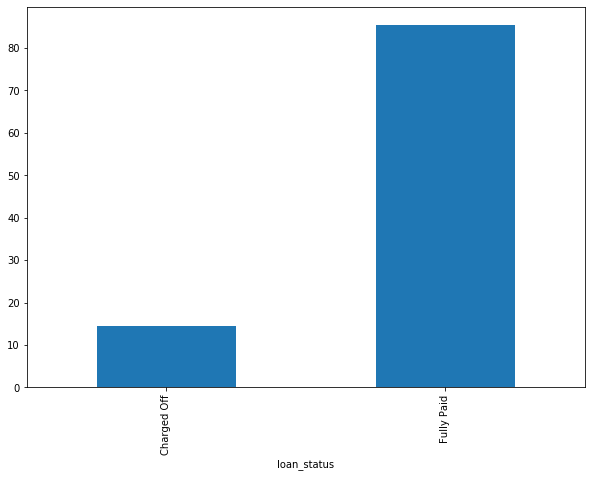

In [33]:
plt.figure(figsize=(10,7))
((loan.groupby('loan_status').loan_amnt.count()/len(loan))*100).plot.bar()
plt.show()

From the above plot we can say that most of the people are paying the loan fully

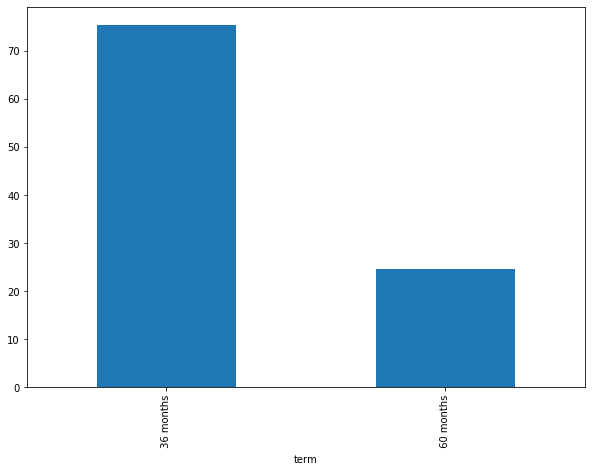

In [34]:
plt.figure(figsize=(10,7))
((loan.groupby('term').term.count()/len(loan))*100).plot.bar()
plt.show()

From the above plot we come to know that there are lot of people about 70% who take loan for term of 36 months.

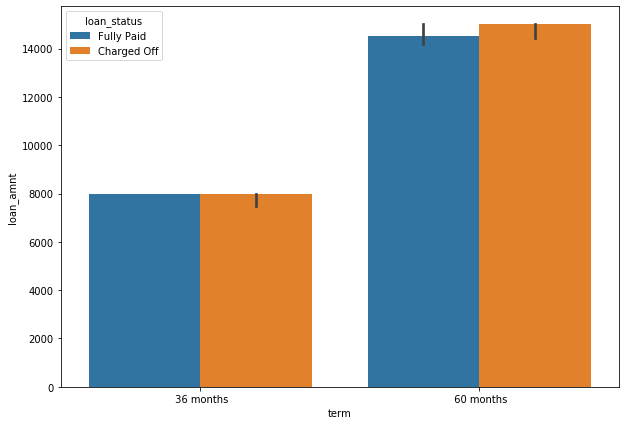

In [39]:
plt.figure(figsize=(10,7))
sns.barplot(x='term',y='loan_amnt',data=loan,hue='loan_status',estimator =np.median)
plt.show()


From the above plot we come to know that loan amount is high for 60 months.

In [40]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,37,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,Nov-04,3,NaN,NaN,9,0,12,f,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,NaN,Jan-16,0.0


In [41]:
loan['home_ownership'].value_counts()

RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

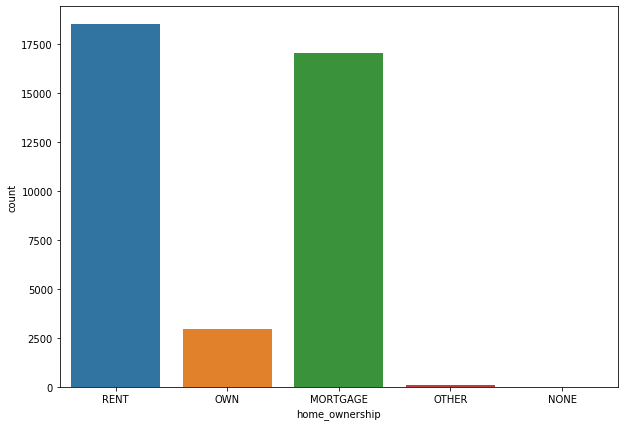

In [42]:
plt.figure(figsize=(10,7))
sns.countplot(x='home_ownership',data = loan)

From Above we come to know that majority of the people who apply for loan come under RENT type of Home ownership,followed by MORTGAGE therby OWN and OTHER.

In [43]:
loan.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

In [44]:
#Analysis using 'loan_amnt' : it is the listed amount of the loan applied for by the borrower. 
#If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

loan['loan_amnt'].describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

We are able to see that the Loan amount ranges between 500 USD and 35,000 USD, and has a mean value of 10000 USD

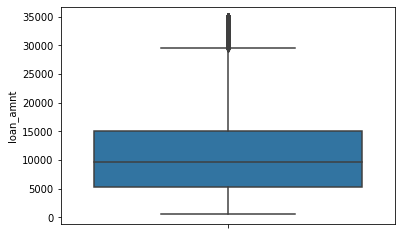

In [45]:
sns.boxplot(y=loan['loan_amnt'])
plt.yscale('linear')
plt.show()

we are able to see that majority of the values in boxplot are spread across the range 5000 to 15000

In [46]:
#Finding out the statistic summary of loan amount against individual loan status 
loan.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5627.0,12104.385108,8085.732038,900.0,5600.0,10000.0,16500.0,35000.0
Fully Paid,32950.0,10866.455994,7199.629493,500.0,5200.0,9600.0,15000.0,35000.0


masterloan = pd.DataFrame(loan.groupby('purpose')['loan_status'].value_counts(normalize=True).loc[:,['Fully Paid','Charged Off']]) #.sort_values(ascending=False)
masterloan.rename(columns={'loan_status':'col'},inplace = True)
masterloan.reset_index(inplace = True)

In [47]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,37,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,Nov-04,3,NaN,NaN,9,0,12,f,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,NaN,Jan-16,0.0


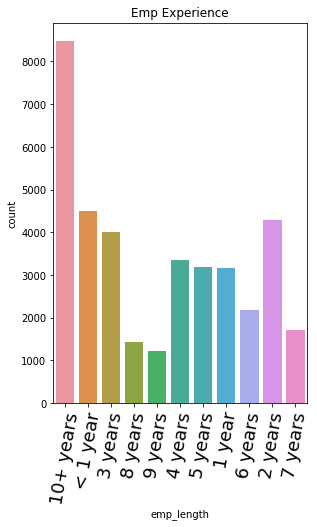

In [48]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
sns.countplot(x='emp_length',data = loan)
plt.title("Emp Experience")
plt.xticks(rotation=80,fontsize=18)
plt.show()


10 Years and above employees are the one who are taking maximum loans.
Employees who have 9 years of experience are the ones who are taking the least amount of loans.

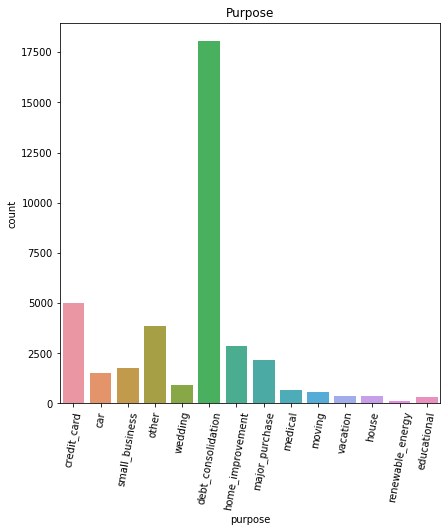

In [49]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.countplot(x='purpose',data = loan)
plt.title("Purpose")
plt.xticks(rotation=80,fontsize=10)
plt.show()

We can see that people in the experience bracket of 10 years and above are the majority who are taking loan.
We can also see that Debt_consolidation is the main  reason people are taking loans.

In [50]:
loan['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

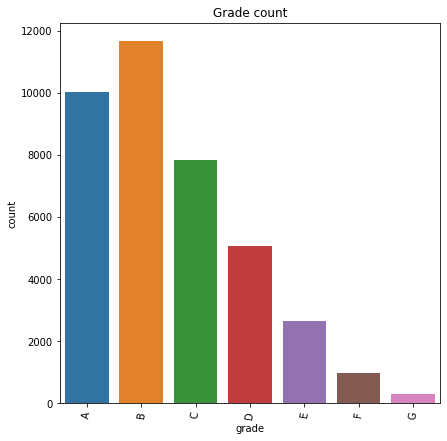

In [51]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.countplot(x='grade',data = loan, order = ['A','B','C','D','E','F','G'])
plt.title("Grade count")
plt.xticks(rotation=80,fontsize=10)
plt.show()

### Mostly people are taking 'B' Grade loan followed by A,C,D,E,F,G

# Bivariate Analysis

In [52]:
m = loan[loan['loan_status'] == 'Charged Off']

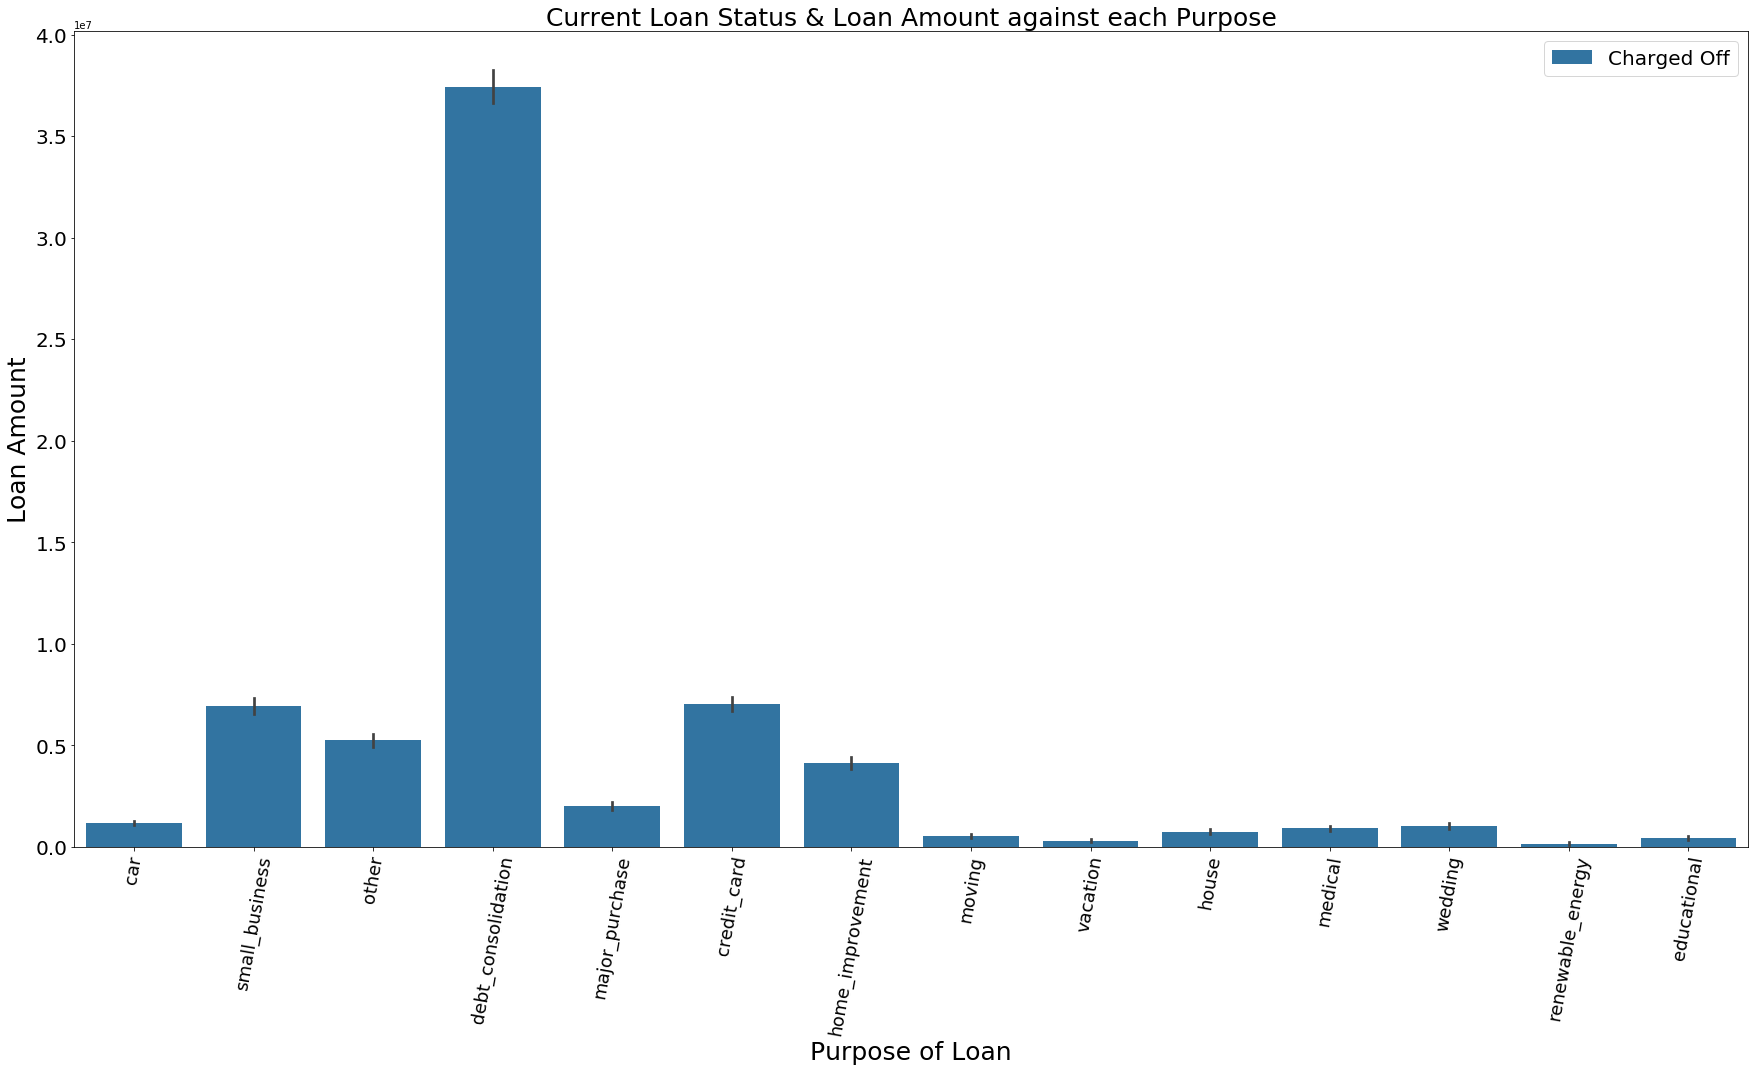

In [53]:
#Plotting the avergae loan amount borrowed for each Purpose 

plt.figure(figsize=(30, 15))
#loan_data=loan_data.sort_values(by='loan_amnt',ascending=False)
sns.barplot(y='loan_amnt',x='purpose', data=m, hue='loan_status',estimator=np.sum)
plt.xticks(rotation=80,fontsize=18)
plt.yticks(fontsize=20)
plt.title("Current Loan Status & Loan Amount against each Purpose",fontsize=25)
plt.xlabel("Purpose of Loan",fontsize=25)
plt.ylabel("Loan Amount",fontsize=25)
#plt.yticks(np.arange(0, 1000000, 100000))
plt.legend(prop={'size': 20})
plt.show()

### In the above figure we have summed the total amount of charged off for each purpose and found that Debt_consolidation is where we need to be careful while lending money to borrower.

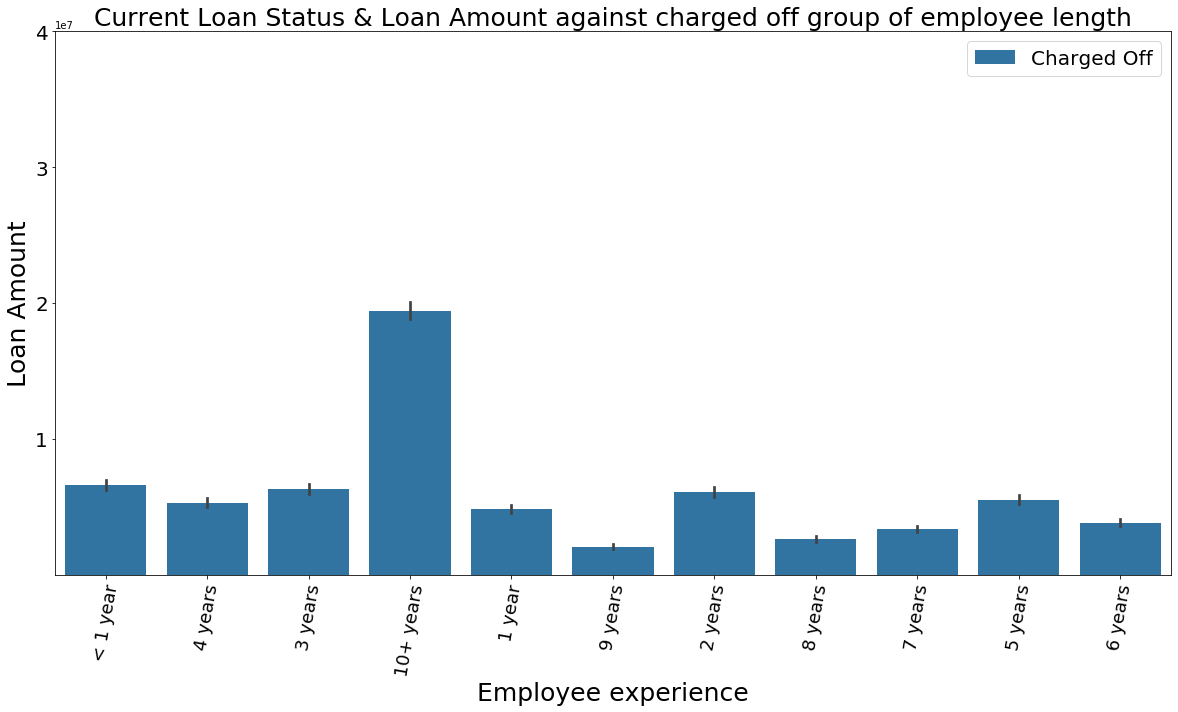

In [54]:
plt.figure(figsize=(20, 10))

sns.barplot(y='loan_amnt',x='emp_length', data=m,hue='loan_status',estimator=sum)
plt.xticks(rotation=80,fontsize=18)
plt.yticks(fontsize=20)
plt.title("Current Loan Status & Loan Amount against charged off group of employee length",fontsize=25)
plt.xlabel("Employee experience",fontsize=25)
plt.ylabel("Loan Amount",fontsize=25)
plt.yticks(np.arange(10000000,50000000, 10000000))
plt.legend(prop={'size': 20})
plt.show()

(24.0, 0.0)

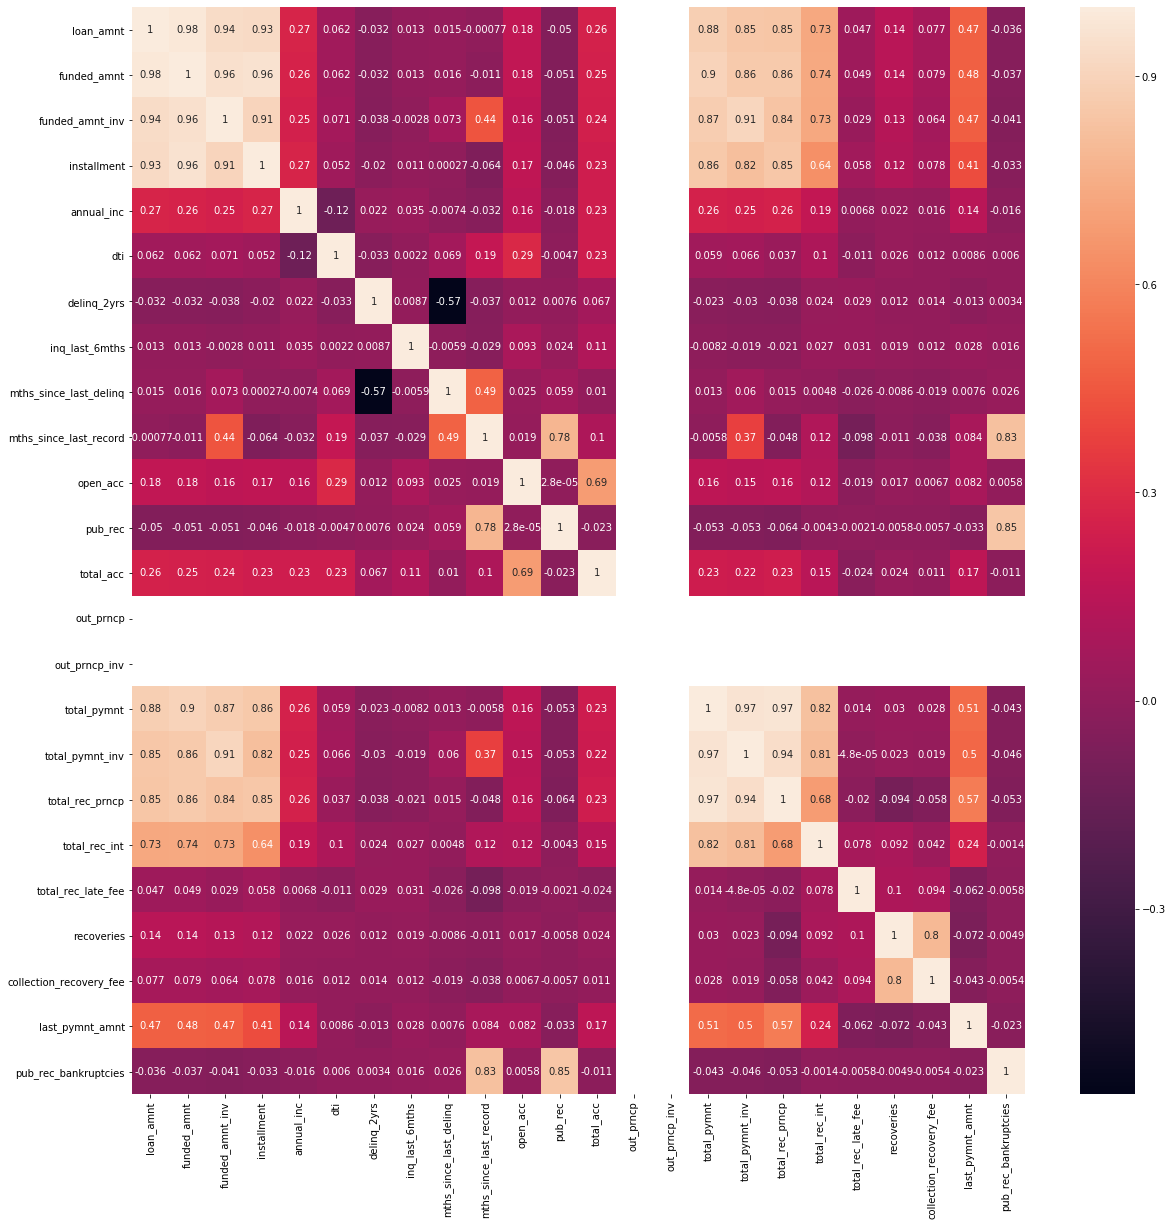

In [55]:
plt.figure(figsize = [20,20])
ax = sns.heatmap(loan.corr(),annot=True)
top, bottom = ax.get_ylim()
ax.set_ylim(top+0.5, bottom-0.5)

In [56]:
loan.out_prncp_inv.unique()

array([0.])

In [57]:
loan.out_prncp.unique()

array([0.])

From the above correlation plot we can see that column out_prncp_inv and out_prncp are not correlated to any column and also the value in them is 0.
so removing those columns

In [58]:
loan.drop(columns = ['out_prncp','out_prncp_inv'] ,axis = 1,inplace=True)

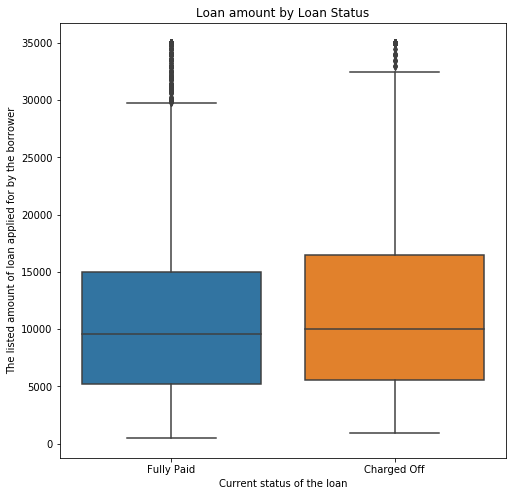

In [59]:
#Plotting the amount of loan paid against each of the current loan status 
plt.figure(figsize=(8, 8))
sns.boxplot(x='loan_status',y='loan_amnt', data=loan)
plt.title("Loan amount by Loan Status")
plt.xlabel("Current status of the loan")
plt.ylabel("The listed amount of loan applied for by the borrower")
plt.show()

--> From the above plot, it is observed that the Charged Off category seams to have higher loan amounts.

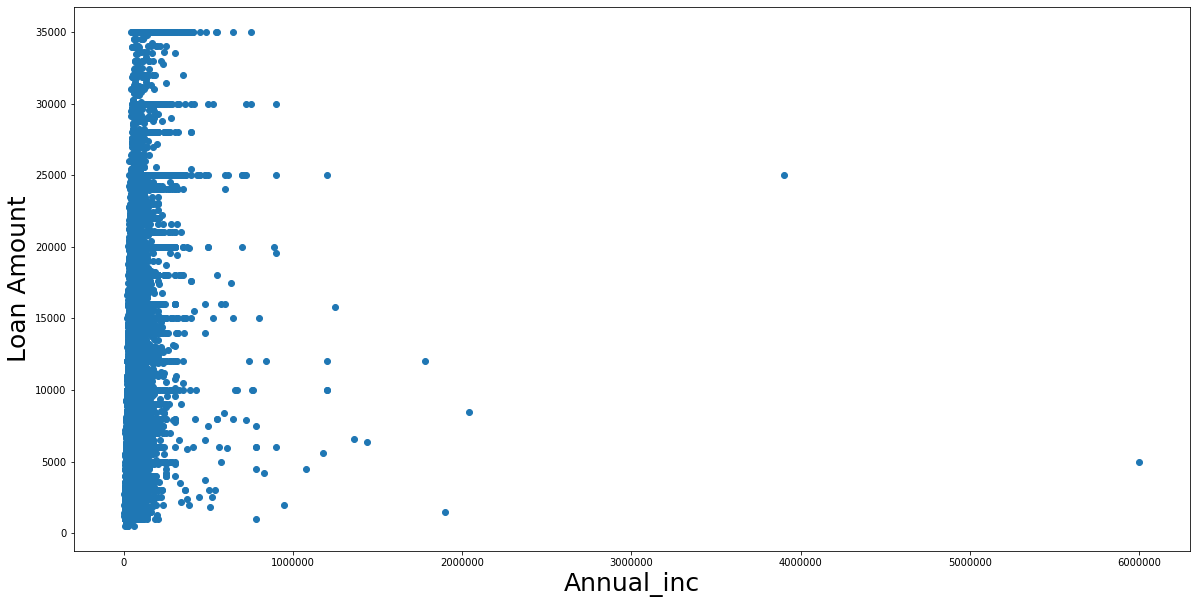

In [60]:
plt.figure(figsize=(20, 10))

plt.scatter(x=loan['annual_inc'],y=loan['loan_amnt'],norm=True)


plt.xlabel("Annual_inc",fontsize=25)
plt.ylabel("Loan Amount",fontsize=25)
plt.show()

<Figure size 1440x1440 with 0 Axes>

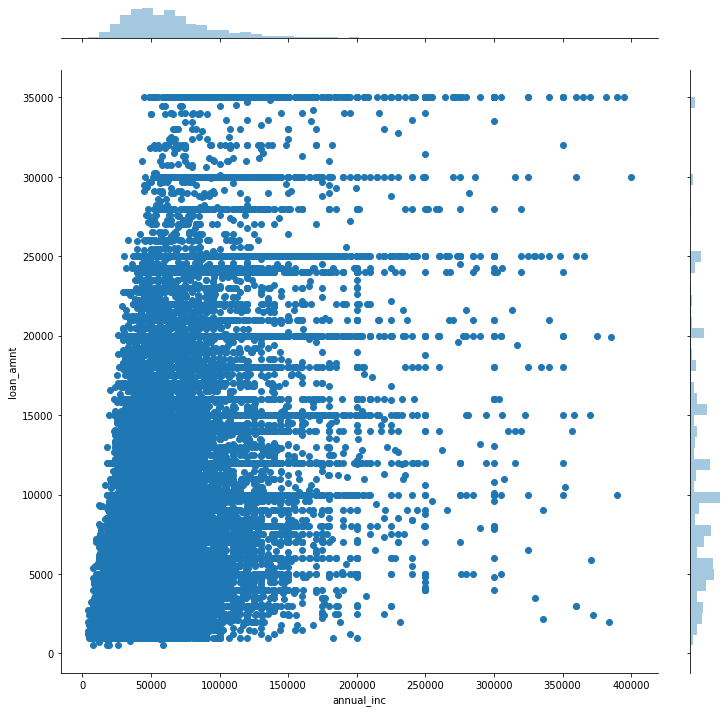

In [61]:
plt.figure(figsize=(20, 20))
sns.jointplot('annual_inc', 'loan_amnt',loan.loc[loan['annual_inc']<400000],height=10,ratio=10,space =1)
plt.show()

From the above plot we can make out that people who have annual income in the range of 0 to 2 lakhs are the ones who are taking most of the loan and in the range of 0 to  35000

In [62]:
#masterloan1.groupby(by = 'emp_length')['loan_amnt'].sum()
loan.int_rate = loan.int_rate.apply(lambda x : x.replace('%','')).astype(float)

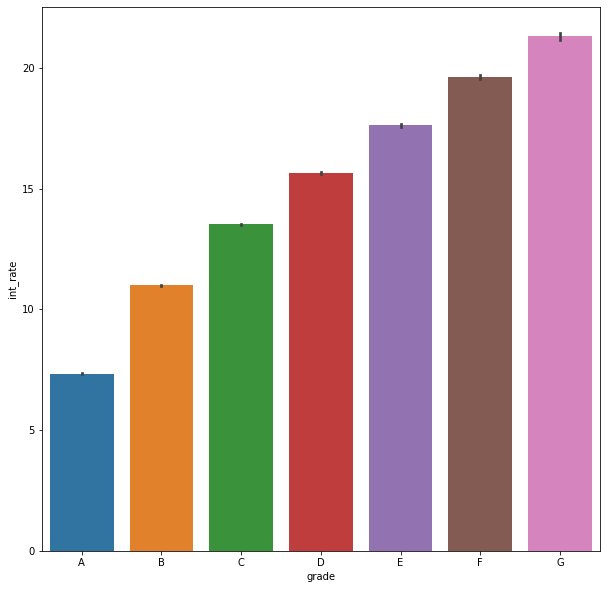

In [242]:
plt.figure(figsize = (10,10))
sns.barplot(x ='grade' ,y = 'int_rate',data=loan ,order = ['A','B','C','D','E','F','G'] )

From the above plot we can see that as the grade increases the interest rate increases

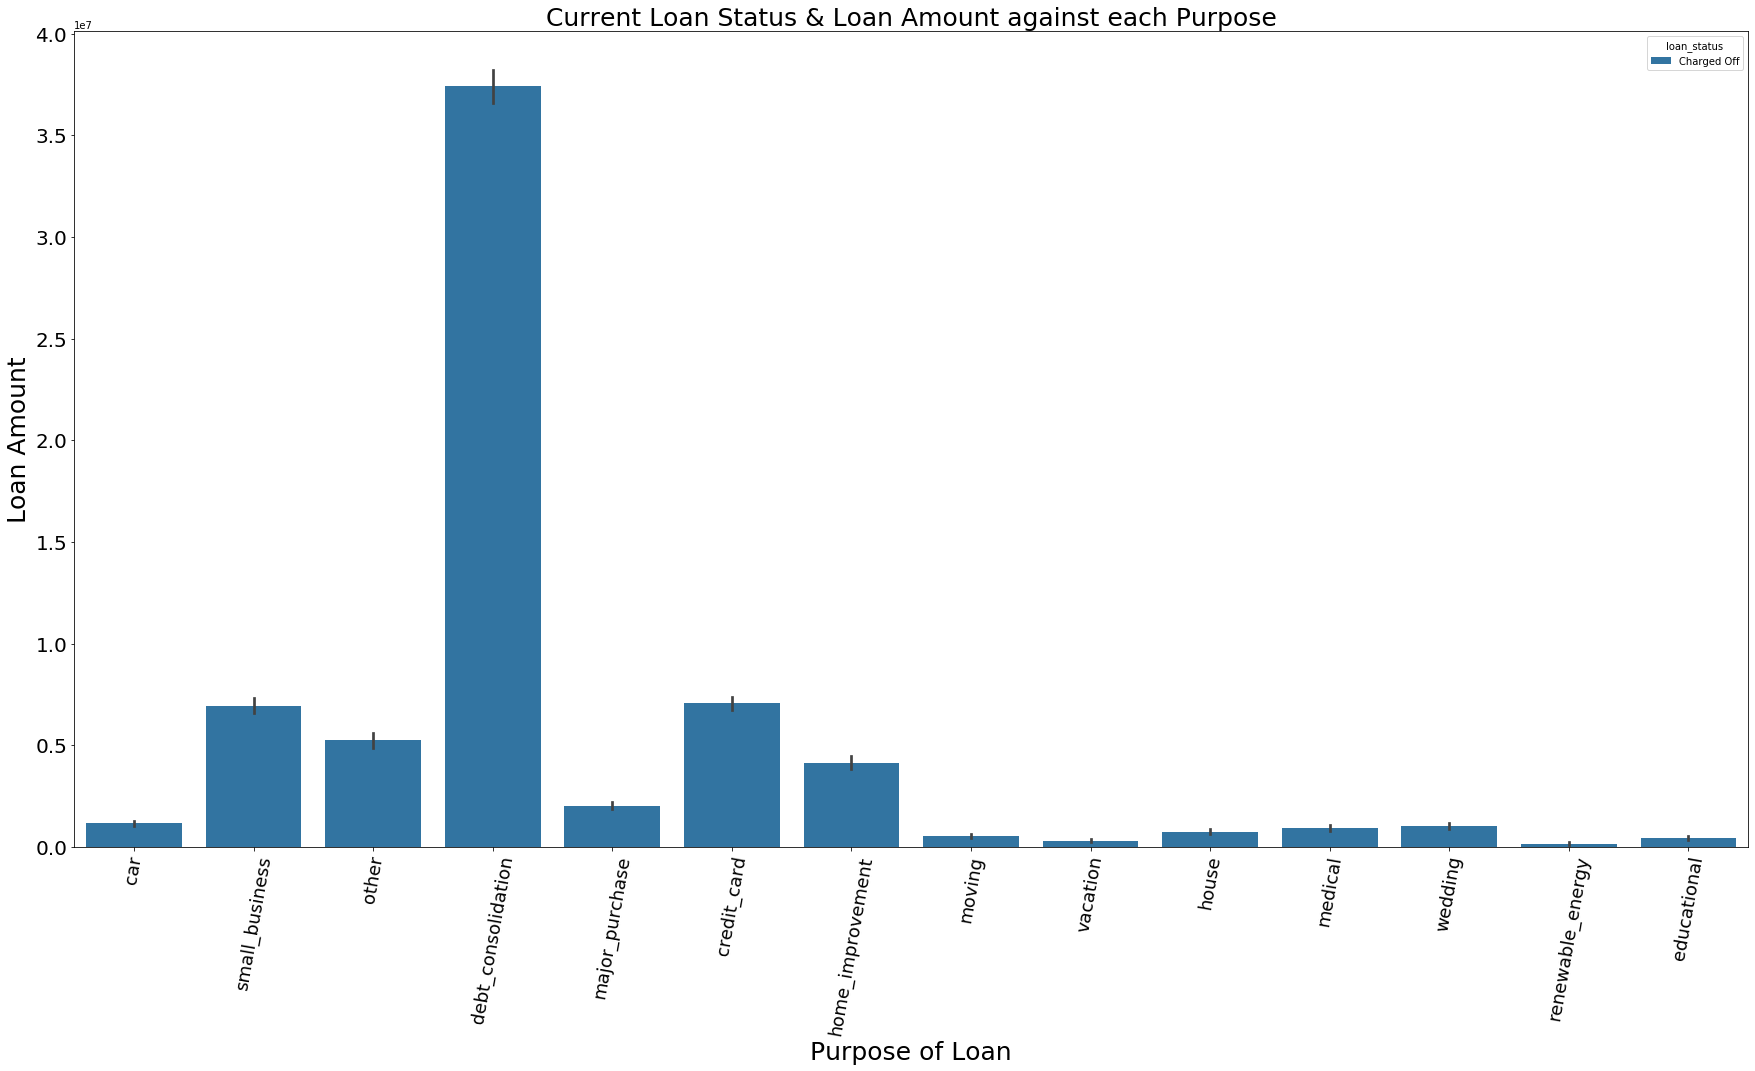

In [64]:
plt.figure(figsize=(30, 15))
#loan_data=loan_data.sort_values(by='loan_amnt',ascending=False)
sns.barplot(y='loan_amnt',x='purpose', data=m, hue='loan_status',estimator=np.sum)
plt.xticks(rotation=80,fontsize=18)
plt.yticks(fontsize=20)
plt.title("Current Loan Status & Loan Amount against each Purpose",fontsize=25)
plt.xlabel("Purpose of Loan",fontsize=25)
plt.ylabel("Loan Amount",fontsize=25)
#plt.yticks(np.arange(0, 5000000, 100000))
#plt.legend(prop={'size': 20})
plt.show()

From the above plot we can see that debt_consolidation is one of the main reasons of Defaultee.

In [65]:
#Filtering rows with Charged Off as loan status
m = loan[loan['loan_status'] == 'Charged Off' ]

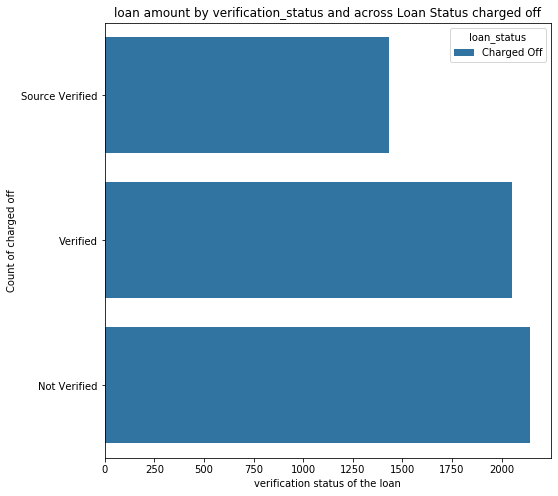

In [66]:
#Plotting the amount of loan paid against each of the current loan status 
plt.figure(figsize=(8, 8))
sns.countplot(y='verification_status',hue='loan_status', data=m,)
plt.title("loan amount by verification_status and across Loan Status charged off")
plt.xlabel("verification status of the loan")
plt.ylabel("Count of charged off")
plt.show()

From the above figure we come to know that when the loan applicant is Source Verified he is less likely to Default compared to Verified and Not Verified Applicants . Not Verified applicants are more likely to Charge Off.

In [67]:
loan.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'total_acc', 'initial_list_status', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

In [68]:
m.groupby(by=['verification_status','loan_status'])['loan_status'].count().sort_values()

verification_status  loan_status
Source Verified      Charged Off    1434
Verified             Charged Off    2051
Not Verified         Charged Off    2142
Name: loan_status, dtype: int64

In [69]:
loan.groupby(by=['verification_status','loan_status'])['loan_status'].count().sort_values()

verification_status  loan_status
Source Verified      Charged Off     1434
Verified             Charged Off     2051
Not Verified         Charged Off     2142
Source Verified      Fully Paid      8243
Verified             Fully Paid     10155
Not Verified         Fully Paid     14552
Name: loan_status, dtype: int64

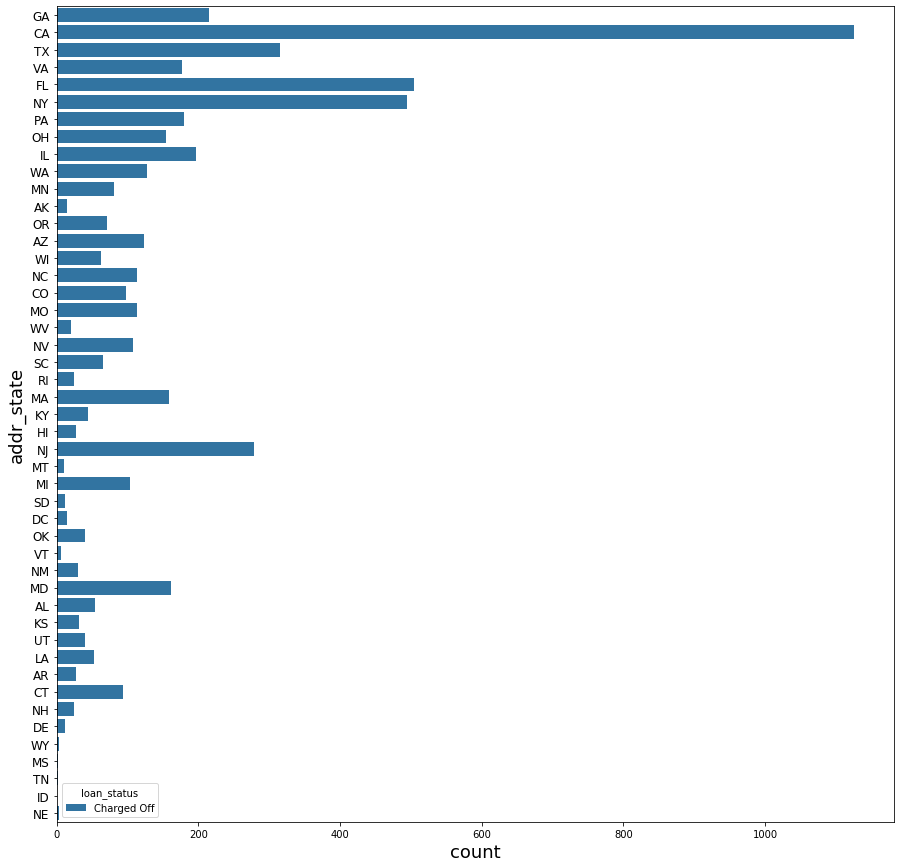

In [70]:
plt.figure(figsize=(15,15))
sns.countplot(y='addr_state',hue='loan_status',data=m)
plt.ylabel('addr_state',fontsize=18)
plt.xlabel('count',fontsize=18)
plt.yticks(fontsize=12)
plt.show()

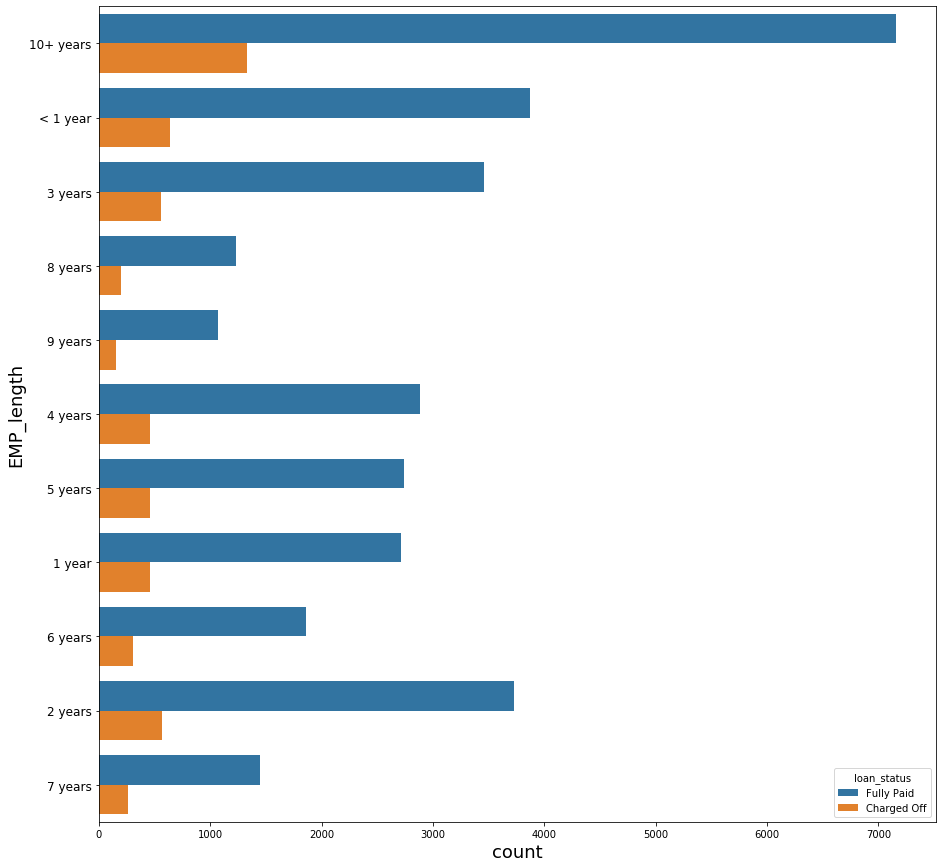

In [72]:
plt.figure(figsize=(15,15))
sns.countplot(y='emp_length',hue='loan_status',data=loan)
plt.ylabel('EMP_length',fontsize=18)
plt.xlabel('count',fontsize=18)
plt.yticks(fontsize=12)
plt.show()

In [77]:
print(loan.issue_d.unique())

['Dec-11' 'Nov-11' 'Oct-11' 'Sep-11' 'Aug-11' 'Jul-11' 'Jun-11' 'May-11'
 'Apr-11' 'Mar-11' 'Feb-11' 'Jan-11' 'Dec-10' 'Nov-10' 'Oct-10' 'Sep-10'
 'Aug-10' 'Jul-10' 'Jun-10' 'May-10' 'Apr-10' 'Mar-10' 'Feb-10' 'Jan-10'
 'Dec-09' 'Nov-09' 'Oct-09' 'Sep-09' 'Aug-09' 'Jul-09' 'Jun-09' 'May-09'
 'Apr-09' 'Mar-09' 'Feb-09' 'Jan-09' 'Dec-08' 'Nov-08' 'Oct-08' 'Sep-08'
 'Aug-08' 'Jul-08' 'Jun-08' 'May-08' 'Apr-08' 'Mar-08' 'Feb-08' 'Jan-08'
 'Dec-07' 'Nov-07' 'Oct-07' 'Sep-07' 'Aug-07' 'Jul-07' 'Jun-07']


In [76]:
loan.earliest_cr_line.nunique()

524

In [79]:
loan.delinq_2yrs.unique()

array([ 0,  2,  3,  1,  4,  6,  5,  8,  7,  9, 11], dtype=int64)

In [81]:
loan.nunique()

2853

In [88]:
loan['issue_d'] = pd.to_datetime(loan['issue_d'],format='%b-%y')

In [92]:
loan['issue_d'].unique()

array(['2011-12-01T00:00:00.000000000', '2011-11-01T00:00:00.000000000',
       '2011-10-01T00:00:00.000000000', '2011-09-01T00:00:00.000000000',
       '2011-08-01T00:00:00.000000000', '2011-07-01T00:00:00.000000000',
       '2011-06-01T00:00:00.000000000', '2011-05-01T00:00:00.000000000',
       '2011-04-01T00:00:00.000000000', '2011-03-01T00:00:00.000000000',
       '2011-02-01T00:00:00.000000000', '2011-01-01T00:00:00.000000000',
       '2010-12-01T00:00:00.000000000', '2010-11-01T00:00:00.000000000',
       '2010-10-01T00:00:00.000000000', '2010-09-01T00:00:00.000000000',
       '2010-08-01T00:00:00.000000000', '2010-07-01T00:00:00.000000000',
       '2010-06-01T00:00:00.000000000', '2010-05-01T00:00:00.000000000',
       '2010-04-01T00:00:00.000000000', '2010-03-01T00:00:00.000000000',
       '2010-02-01T00:00:00.000000000', '2010-01-01T00:00:00.000000000',
       '2009-12-01T00:00:00.000000000', '2009-11-01T00:00:00.000000000',
       '2009-10-01T00:00:00.000000000', '2009-09-01

### Derived metrics month and year

In [97]:
loan['month'] = loan['issue_d'].dt.month

In [100]:
loan['year'] = loan['issue_d'].dt.year

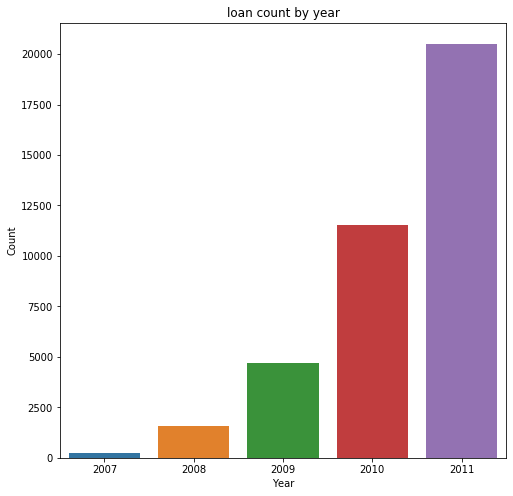

In [104]:
plt.figure(figsize=(8, 8))
sns.countplot(x='year', data=loan)
plt.title("loan count by year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

We can see above that number of people taking loan is gradually increasing every year

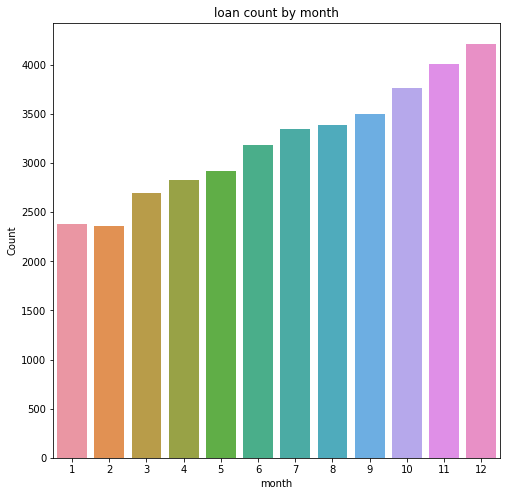

In [105]:
plt.figure(figsize=(8, 8))
sns.countplot(x='month', data=loan)
plt.title("loan count by month")
plt.xlabel("month")
plt.ylabel("Count")
plt.show()

We can see that number of people taking loans gradually increases every month and lot of people take loans during the year end

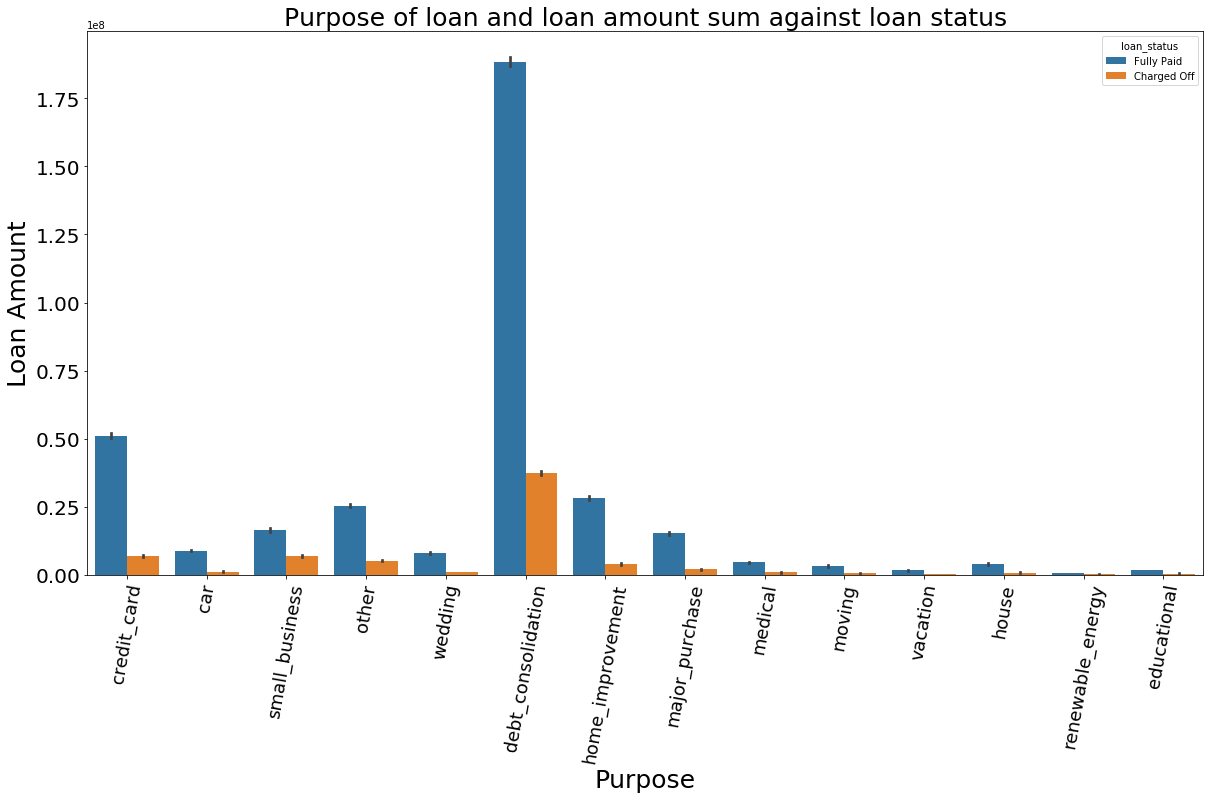

In [95]:
plt.figure(figsize=(20, 10))

sns.barplot(y='loan_amnt',x='purpose', data=loan,hue='loan_status',estimator=sum)
plt.xticks(rotation=80,fontsize=18)
plt.yticks(fontsize=20)
plt.title("Purpose of loan and loan amount sum against loan status",fontsize=25)
plt.xlabel("Purpose",fontsize=25)
plt.ylabel("Loan Amount",fontsize=25)

plt.show()

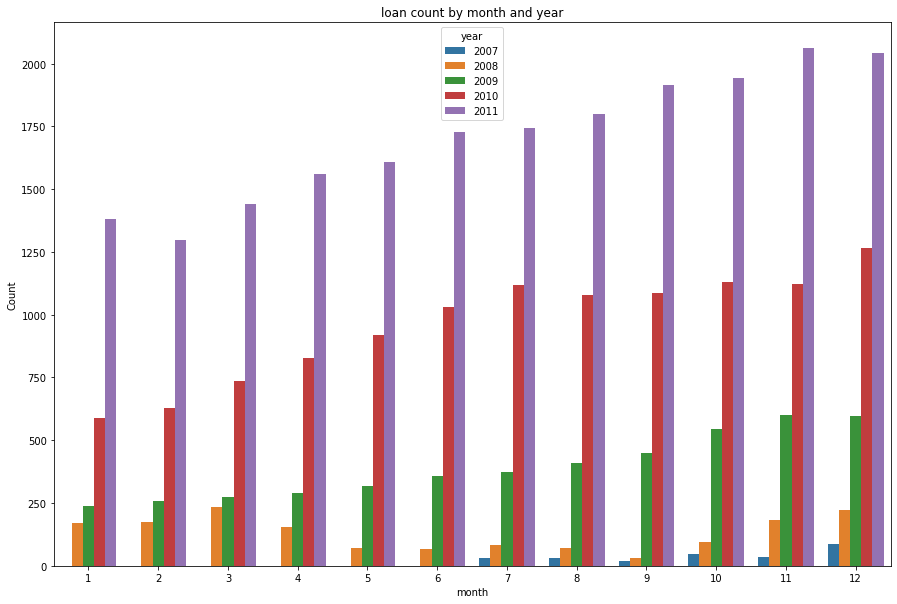

In [110]:
plt.figure(figsize=(15,10))
sns.countplot(x='month', hue='year',data=loan)
plt.title("loan count by month and year")
plt.xlabel("month")
plt.ylabel("Count")
plt.show()

From the above plot we can see that majority of loan was taken in november 2011
looking at the plot generally we see that lot of loan is been taken in the months of october november and december or 4th quarter of the year.

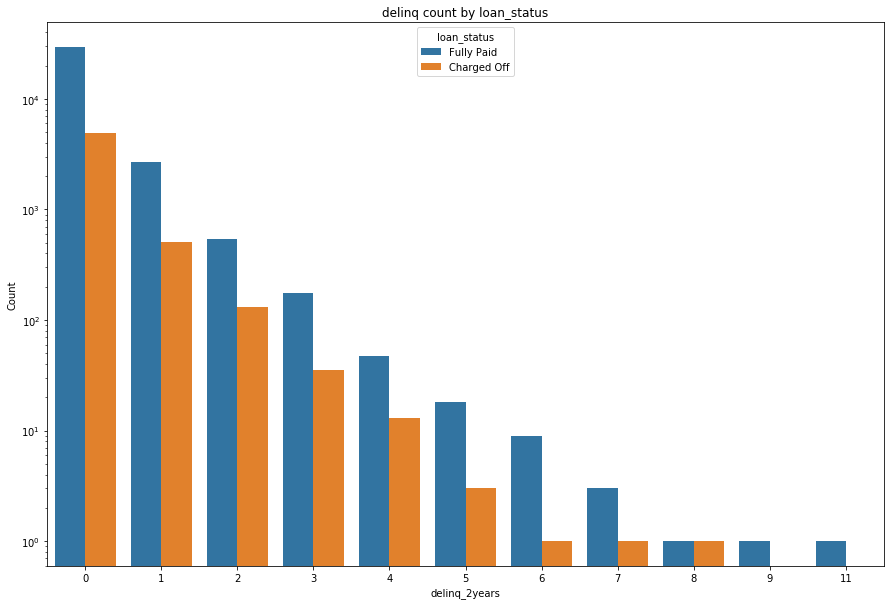

In [112]:
plt.figure(figsize=(15,10))
sns.countplot(x='delinq_2yrs', hue='loan_status',data=loan)
plt.title("delinq count by loan_status")
plt.xlabel("delinq_2years")
plt.ylabel("Count")
plt.yscale('log')
plt.show()

From the above plot we come to know that as the delinq number increases charge off number also increases.

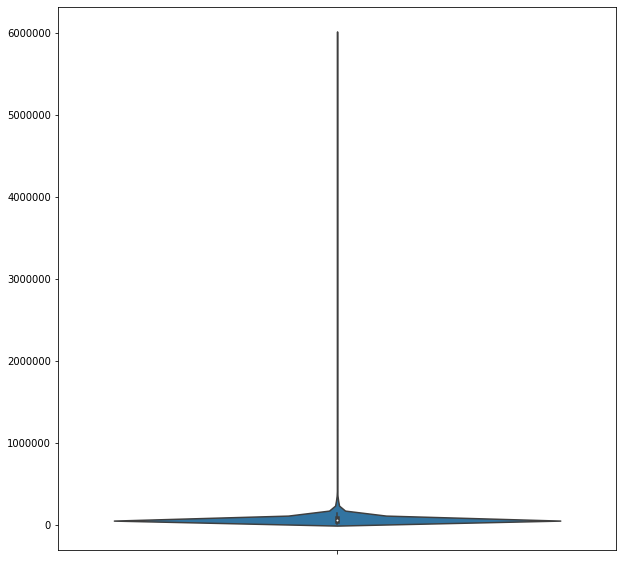

In [146]:
plt.figure(figsize=(10,10))
sns.violinplot(y=['annual_inc'],data=loan)
plt.yscale('linear')
plt.show()

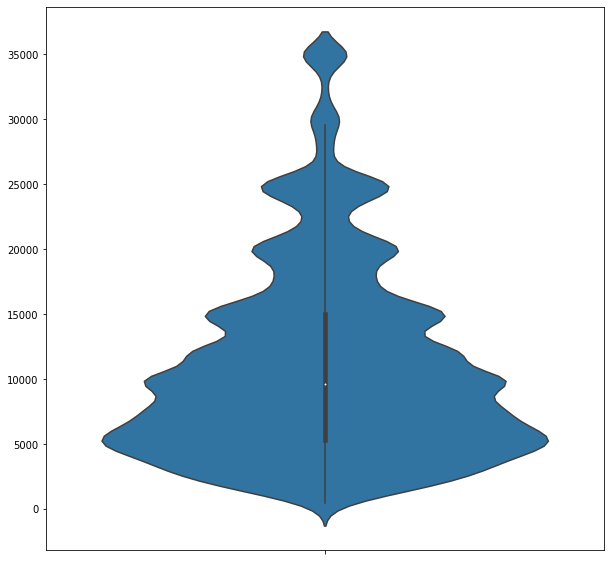

In [143]:
plt.figure(figsize=(10,10))
sns.violinplot(y=['loan_amnt'],data=loan)
plt.yscale('linear')
plt.show()

In [144]:
loan.loan_amnt.describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

### From the above violin plot we see that majority of the loan amount lies between 5000 to 15000

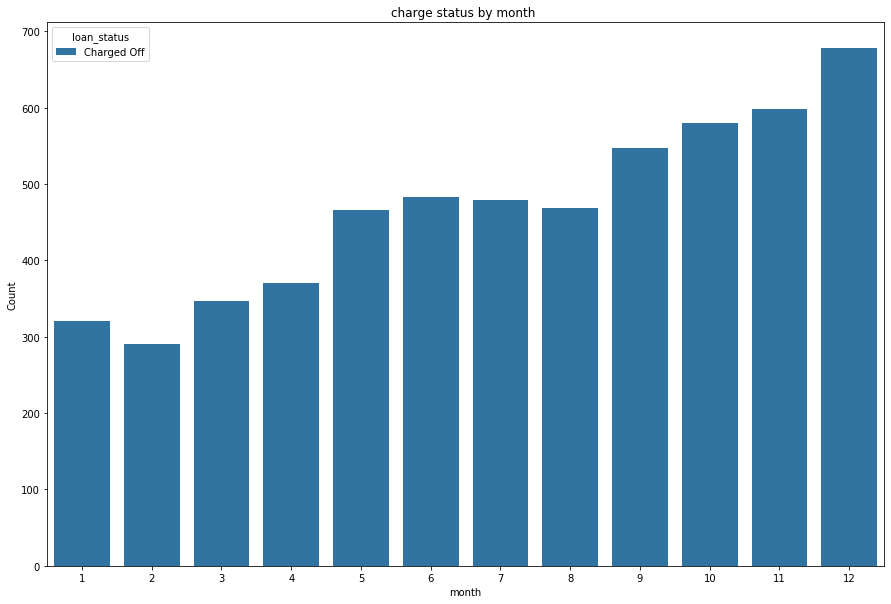

In [276]:
plt.figure(figsize=(15,10))
sns.countplot(x='month', hue='loan_status',data=loan[loan['loan_status'] == 'Charged Off'])
plt.title("charge status by month ")
plt.xlabel("month")
plt.ylabel("Count")
plt.show()


people who take loan in the 4th quarter (october,november,december) are more likely to be charged off 
so increase the interest rate in the 4th quarter .

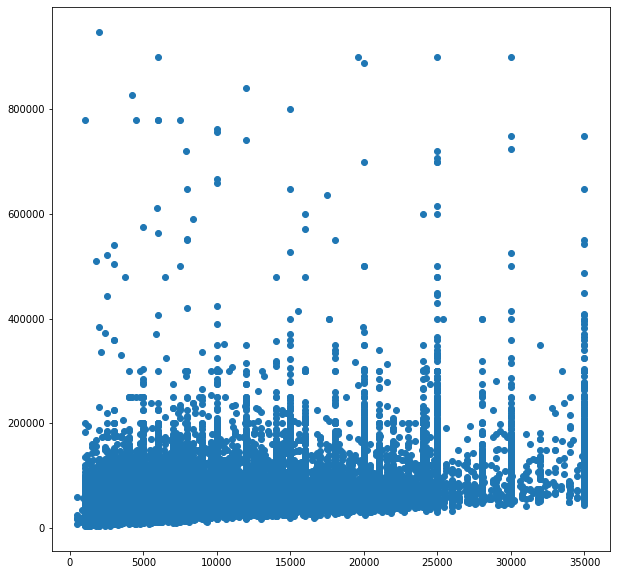

In [196]:
plt.figure(figsize=(10,10))
plt.scatter('loan_amnt','annual_inc',data=loan[loan['annual_inc'] < 1000000])

In [183]:
loan.annual_inc.median()

58868.0

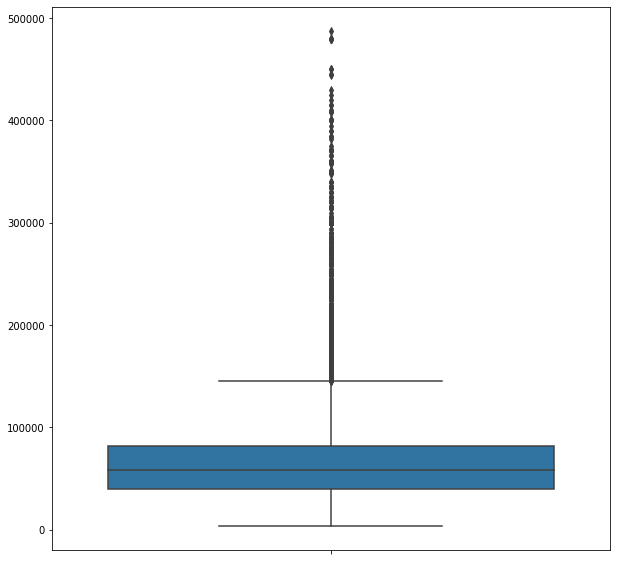

In [190]:
plt.figure(figsize=(10,10))
sns.boxplot(y=['annual_inc'],data=loan[loan['annual_inc'] < 500000])
plt.yscale('linear')
plt.show()

### From the above scatter and boxplot we see that majority of the people who take loan have annual income in the range 58000 to 67000.

In [198]:
loan['annual_inc_bin'] = pd.cut(loan['annual_inc'], 
                                      [x for x in range(0, 1000000, 100000)], labels=[str(x)+'-'+str(x+1)+'lakh' for x in range (0, 9, 1)])

In [200]:
loan['annual_inc_bin'].isnull().sum()

15

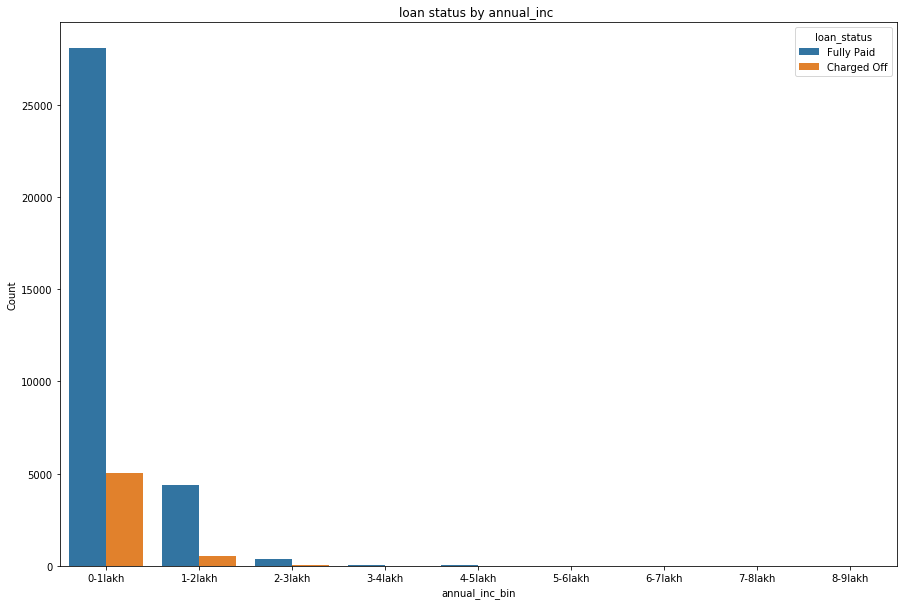

In [204]:
plt.figure(figsize=(15,10))
sns.countplot(x='annual_inc_bin', hue='loan_status',data=loan)
plt.title("loan status by annual_inc ")
plt.xlabel("annual_inc_bin")
plt.ylabel("Count")
plt.show()

<Figure size 2160x2160 with 0 Axes>

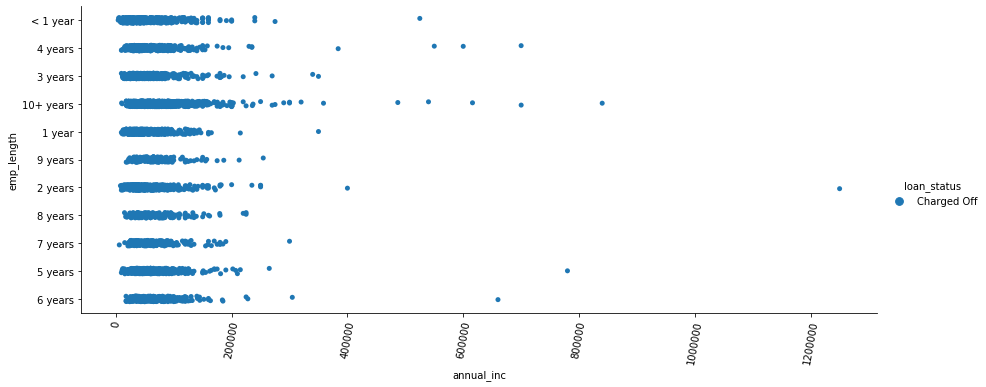

In [236]:
plt.figure(figsize=(30,30))
sns.catplot(x='annual_inc',y='emp_length',hue='loan_status',data=loan[loan['loan_status'] == 'Charged Off'],height=5,aspect=2.5)
plt.xticks(rotation=80)
plt.show()

In [215]:
loan['emp_length'].value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

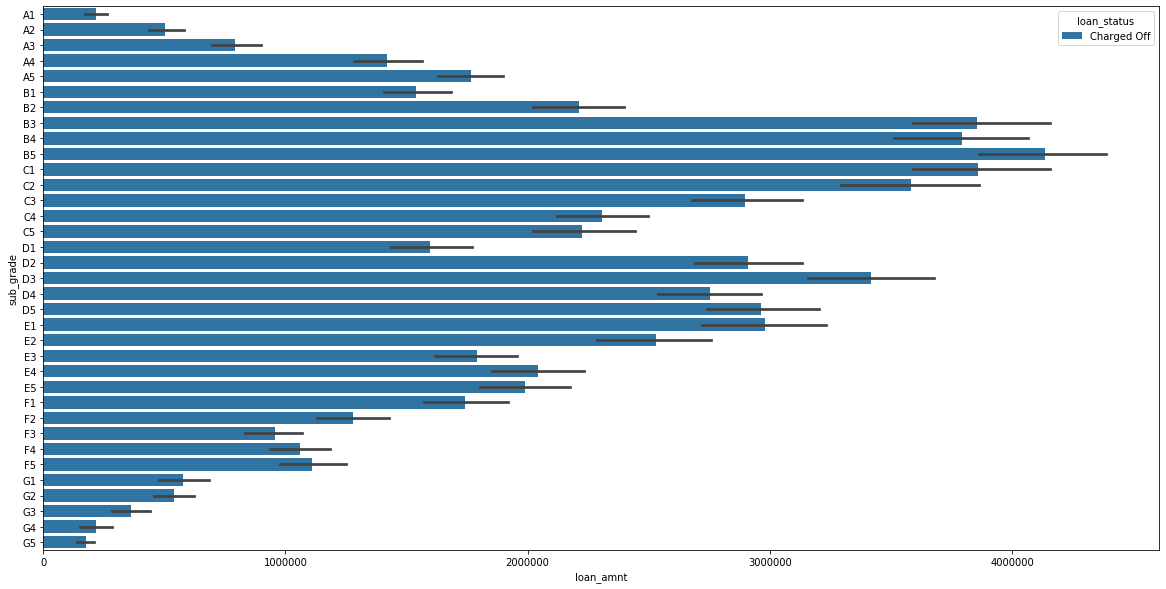

In [271]:
plt.figure(figsize = (20,10))
sns.barplot(y ='sub_grade' ,x ='loan_amnt',hue='loan_status' ,data=loan[loan['loan_status'] == 'Charged Off'].sort_values(by='sub_grade'),estimator=sum )

### In the above we can see which category grades contributes to higher Charge Off 'loan amount'.

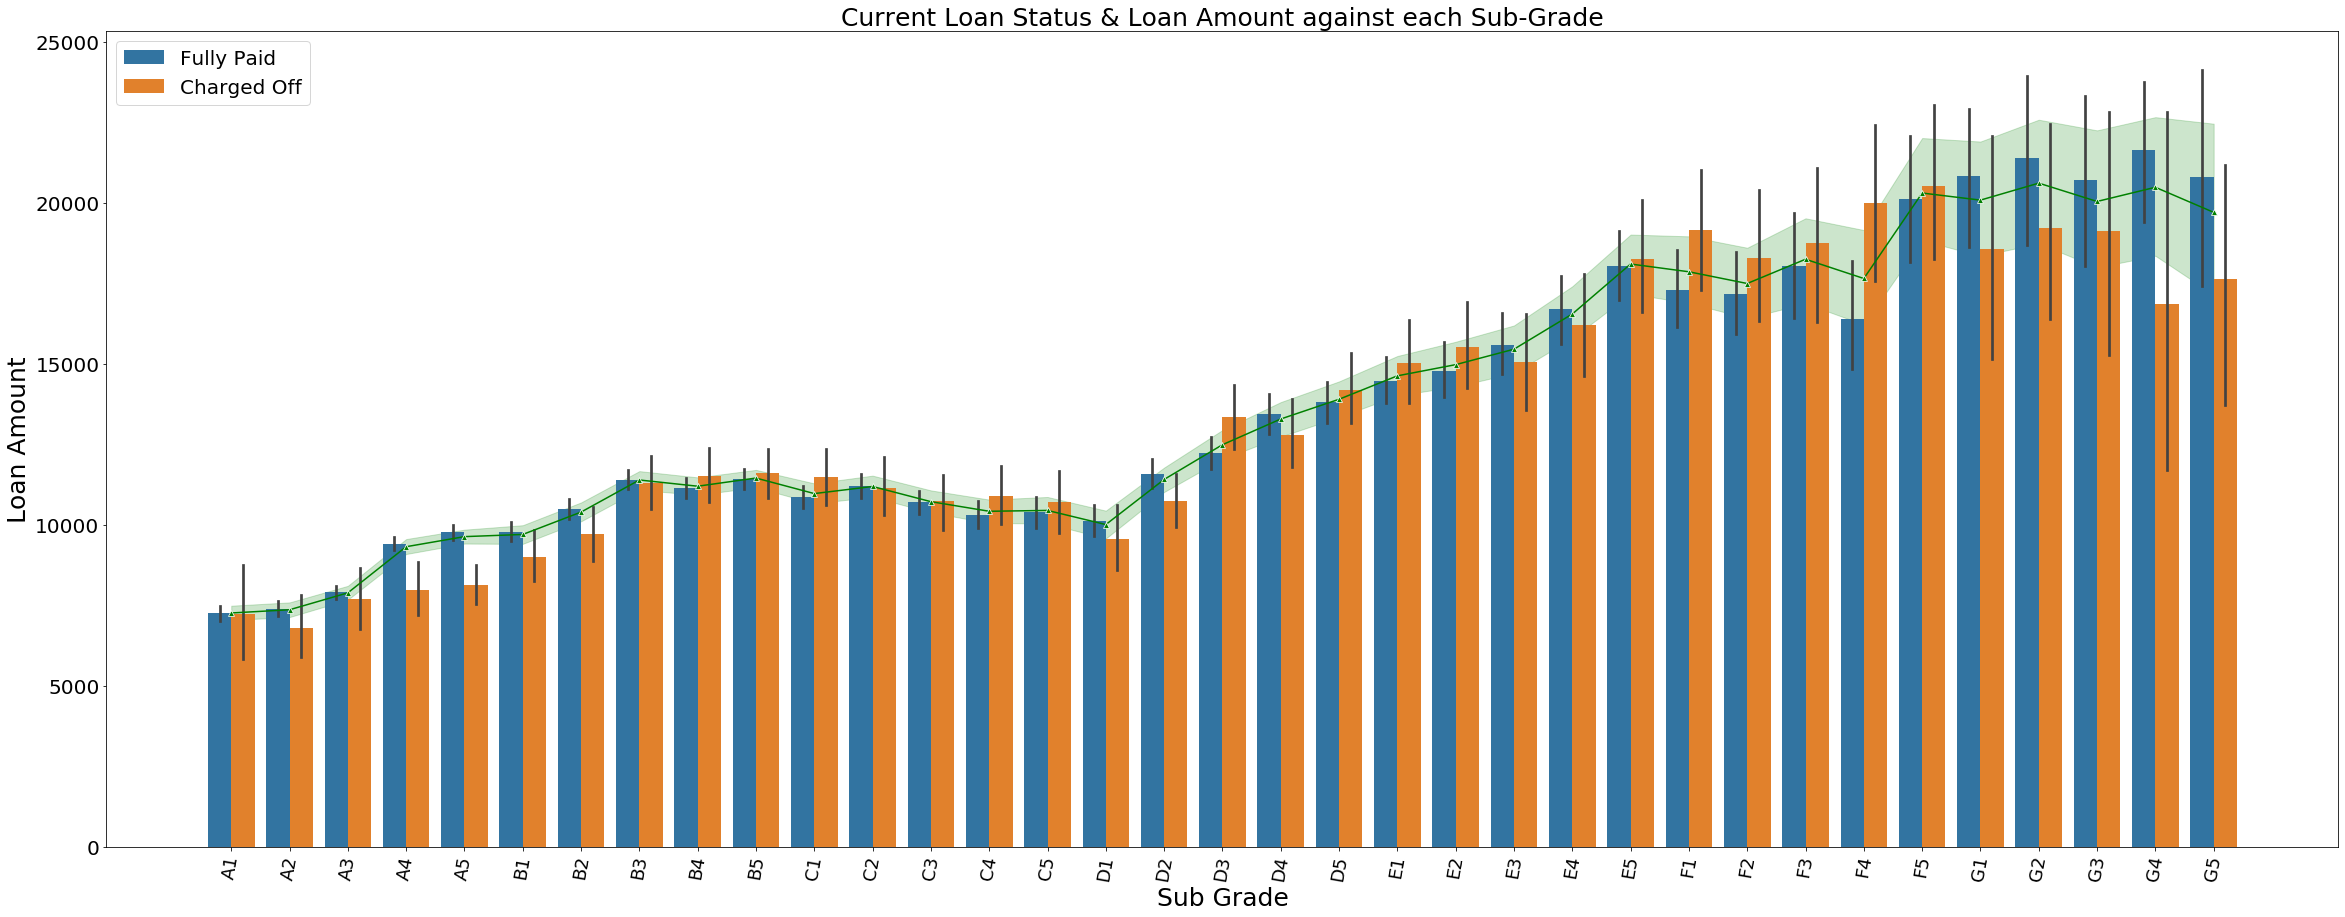

In [254]:
#Plotting the graph for observing a pattern in loan amount against sub-grade
plt.figure(figsize=(40, 15))
loan=loan.sort_values(by='sub_grade')
sns.barplot(y='loan_amnt',x='sub_grade', data=loan,hue='loan_status')
sns.lineplot(y='loan_amnt',x='sub_grade',data=loan,marker='^',color='g')
plt.xticks(rotation=80,fontsize=18)
plt.yticks(fontsize=20)
plt.title("Current Loan Status & Loan Amount against each Sub-Grade",fontsize=25)
plt.xlabel("Sub Grade",fontsize=25)
plt.ylabel("Loan Amount",fontsize=25)
#plt.yticks(np.arange(0, 30000, 1000))
plt.legend(prop={'size': 20})
plt.show()

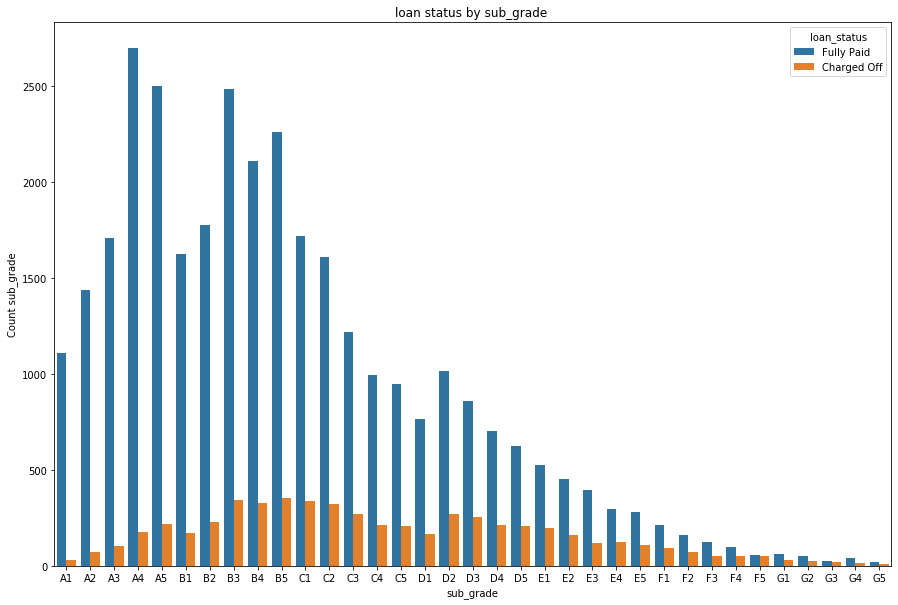

In [269]:
plt.figure(figsize=(15,10))
sns.countplot(x='sub_grade', hue='loan_status',data=loan)
plt.title("loan status by sub_grade ")
plt.xlabel("sub_grade")
plt.ylabel("Count sub_grade")
plt.show()

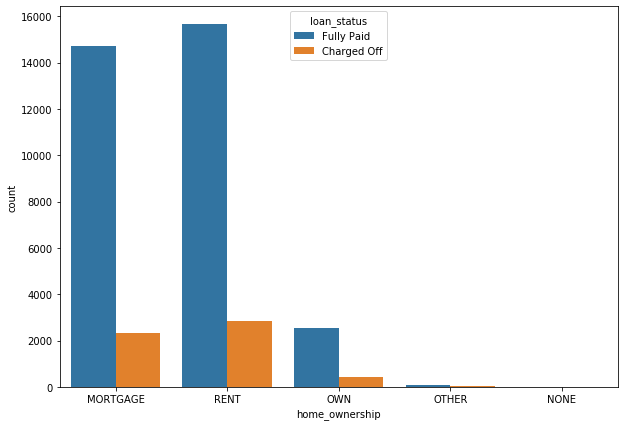

In [275]:
plt.figure(figsize=(10,7))
sns.countplot(x='home_ownership',hue='loan_status', data = loan)